<a href="https://colab.research.google.com/github/saurabh2086/tensorFlowInPractice/blob/master/Exercise4_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [0]:
import tensorflow as tf

In [4]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):# Your Code):
  # Your Code
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("acc") > 0.999):
      print("\ncancle training. 99.9% accuracy reached")
      self.model.stop_training = True
      
                 

callbacks = myCallback()

--2019-06-24 06:40:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2019-06-24 06:40:31 (175 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Your Code Here
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])# Your Code Here #

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 78400)            

In [15]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)# Your Code Here

train_generator = train_datagen.flow_from_directory(
        # Your Code Here
    "/tmp/h-or-s",
    target_size=(300,300),
    batch_size=32,
    class_mode = "binary"
  )

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [16]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(train_generator, 3, epochs=15, callbacks=[callbacks])
      # Your Code Here)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
3/3 [==============================] - 10s 3s/step - loss: 12.9923 - acc: 0.5000
Epoch 2/15
3/3 [==============================] - 8s 3s/step - loss: 1.0287 - acc: 0.5500
Epoch 3/15
3/3 [==============================] - 8s 3s/step - loss: 0.5918 - acc: 0.6000
Epoch 4/15
3/3 [==============================] - 7s 2s/step - loss: 0.4340 - acc: 0.7625
Epoch 5/15
3/3 [==============================] - 7s 2s/step - loss: 0.7239 - acc: 0.6000
Epoch 6/15
3/3 [==============================] - 8s 3s/step - loss: 0.2604 - acc: 0.9750
Epoch 7/15
3/3 [==============================] - 8s 3s/step - loss: 1.1559 - acc: 0.6000
Epoch 8/15
3/3 [==============================] - 8s 3s/step - loss: 0.4010 - acc: 0.8000
Epoch 9/15
3/3 [==============================] - 8s 3s/step - loss: 0.3851 - acc: 0.7625
Epoch 10/15
3/3 [==============================] - 8s 3s/step - loss: 0.3936 - acc: 0.8000
Epoch 11/15
3/3 [==============================] - 8s 3s/step - loss: 0.1051 - acc: 0.9375
Epoch 

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a happy")
  else:
    print(fn + " is a sad")
 

Saving sad3.png to sad3.png
[0.]
sad3.png is a sad


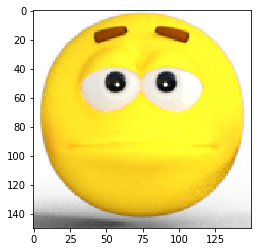

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread("/tmp/h-or-s/sad/sad1-00.png")
plt.imshow(img)